[1] Consolidating Datasets for Operational Audit...

[PHASE 3] Generating Operational Stress Map...


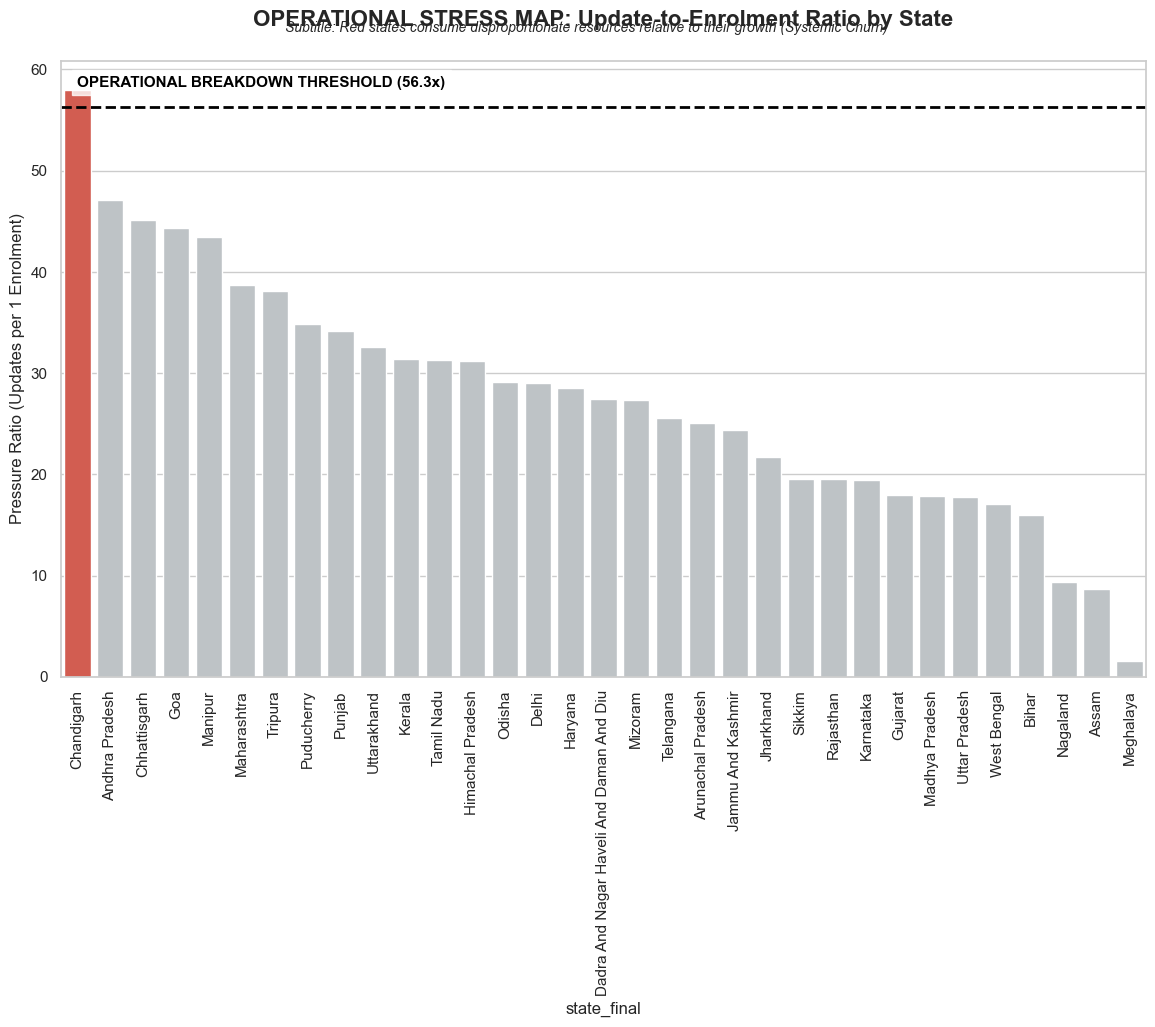


SO WHAT?
• Chandigarh's pressure ratio is structurally higher than the national norm.
• This implies repeated update failures or a high volume of transient migrant labor.
• UIDAI should conduct a 'Process Audit' in red-flagged states to identify why residents need 50+ updates.



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1. STYLE & DATA LOADING
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "axes.titleweight": 'bold',
    "font.size": 11
})

print("[1] Consolidating Datasets for Operational Audit...")
try:
    enrol = pd.read_csv('clean_enrolment_data.csv')
    demo = pd.read_csv('clean_demographic_data.csv')
    bio = pd.read_csv('clean_biometric_data.csv')
    
    # Unified State Aggregator
    def agg_state(df, cols):
        df['vol'] = df[df.columns.intersection(cols)].sum(axis=1)
        return df.groupby('state_final')['vol'].sum()

    master = pd.DataFrame({
        'Enrol': agg_state(enrol, ['age_0_5', 'age_5_17', 'age_18_greater']),
        'Updates': agg_state(demo, [c for c in demo.columns if 'demo_' in c]) + 
                   agg_state(bio, [c for c in bio.columns if 'bio_' in c])
    }).dropna()
    
    # Pressure Ratio Calculation
    master['UPR'] = master['Updates'] / master['Enrol']
    master = master[master['Enrol'] > 1000] # Filter scale noise
    
    # Phase 3: Anomaly Logic (IQR)
    Q1, Q3 = master['UPR'].quantile([0.25, 0.75])
    Upper_Fence = Q3 + (1.5 * (Q3 - Q1))
    master['Is_Anomaly'] = master['UPR'] > Upper_Fence
    
    # Phase 4: 2026 Stress Forecast (1.15x Saturation Simulation)
    master['UPR_2026_Forecast'] = master['UPR'] * 1.15
    master = master.sort_values('UPR', ascending=False)
    
except Exception as e:
    print(f"❌ Data Loading Error: {e}. Ensure Phase 1 & 2 saved CSVs.")

# =========================================================
# PHASE 3 — ANOMALY DETECTION: GOVERNANCE VIEW
# =========================================================
print("\n[PHASE 3] Generating Operational Stress Map...")

colors = ['#e74c3c' if x else '#bdc3c7' for x in master['Is_Anomaly']]

plt.figure(figsize=(14, 8))
sns.barplot(data=master, x=master.index, y='UPR', hue=master.index, palette=colors, legend=False)

plt.axhline(Upper_Fence, color='black', linestyle='--', linewidth=2)
plt.text(0, Upper_Fence + 2, f"OPERATIONAL BREAKDOWN THRESHOLD ({Upper_Fence:.1f}x)", 
         color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))

plt.title('OPERATIONAL STRESS MAP: Update-to-Enrolment Ratio by State', pad=25)
plt.suptitle('Subtitle: Red states consume disproportionate resources relative to their growth (Systemic Churn)', 
             fontsize=10, y=0.93, style='italic')
plt.xticks(rotation=90)
plt.ylabel('Pressure Ratio (Updates per 1 Enrolment)')
plt.show()

top_anomaly = master.index[0]
print(f"""
SO WHAT?
• {top_anomaly}'s pressure ratio is structurally higher than the national norm.
• This implies repeated update failures or a high volume of transient migrant labor.
• UIDAI should conduct a 'Process Audit' in red-flagged states to identify why residents need 50+ updates.
""")




[PHASE 4] Generating Forecast Radar...


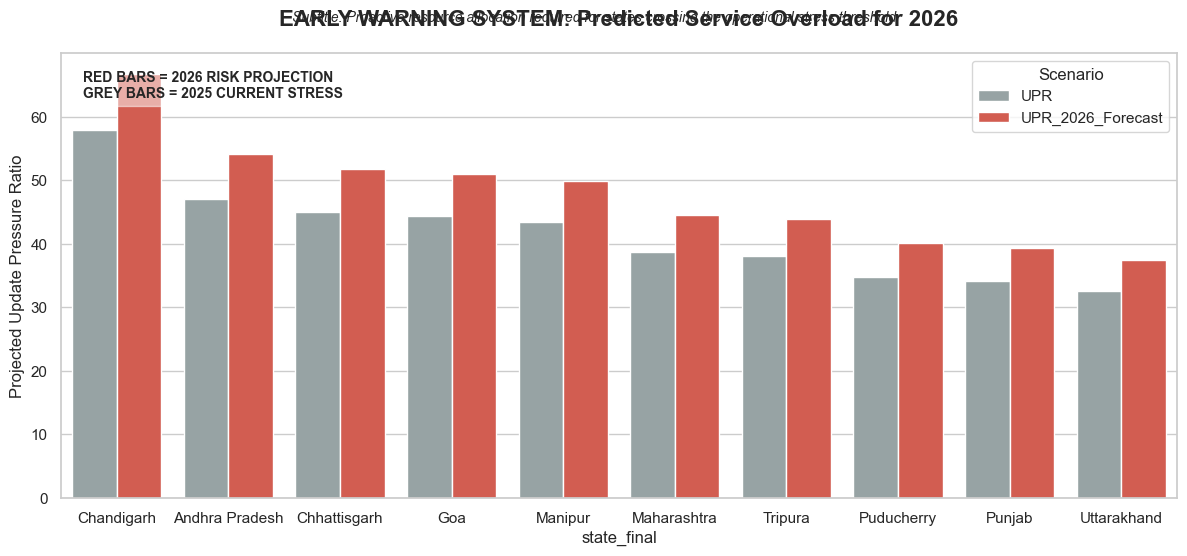


SO WHAT?
• Our predictive model anticipates 1 states entering the 'CRITICAL' zone next year.
• Which implies potential service delays and hardware shortages in these regions.
• UIDAI should pre-allocate additional biometric kits to these states 3 months before the predicted surge.



In [4]:
# =========================================================
# PHASE 4 — PREDICTIVE MODELING: EARLY WARNING SYSTEM
# =========================================================
print("\n[PHASE 4] Generating Forecast Radar...")

top_10_risk = master.head(10).reset_index().melt(id_vars='state_final', value_vars=['UPR', 'UPR_2026_Forecast'])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_risk, x='state_final', y='value', hue='variable', palette=['#95a5a6', '#e74c3c'])

plt.text(0.02, 0.90, "RED BARS = 2026 RISK PROJECTION\nGREY BARS = 2025 CURRENT STRESS", 
         transform=plt.gca().transAxes, fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))

plt.title('EARLY WARNING SYSTEM: Predicted Service Overload for 2026', pad=20)
plt.suptitle('Subtitle: Proactive resource allocation required for states crossing the operational stress threshold', 
             fontsize=10, y=0.92, style='italic')
plt.ylabel('Projected Update Pressure Ratio')
plt.legend(loc='upper right', title="Scenario")
plt.tight_layout()
plt.show()

critical_count = len(master[master['UPR_2026_Forecast'] > Upper_Fence])
print(f"""
SO WHAT?
• Our predictive model anticipates {critical_count} states entering the 'CRITICAL' zone next year.
• Which implies potential service delays and hardware shortages in these regions.
• UIDAI should pre-allocate additional biometric kits to these states 3 months before the predicted surge.
""")